# KFOLD DECESION TREE REGRESSOR

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

In [2]:
# paste your get_features_targets function here
def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0],4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets = data['redshift']
  return features,targets

# paste your median_diff function here
def median_diff(predicted, actual):
  med_diff = np.median(abs(predicted-actual))
  return med_diff

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  accuracy = []
  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    # predict using the model
    prediction = model.predict(test_features)
    # calculate the median_diff from predicted values and append to results array
    accuracy.append(median_diff(prediction, test_targets))
 
  # return the list with your median difference values
  return accuracy

if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model with a maximum depth of 19
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  diffs = cross_validate_model(dtr, features, targets, 10)

  # Print the values
  print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
  print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Differences: 0.018, 0.016, 0.017, 0.018, 0.017, 0.018, 0.018, 0.017, 0.017, 0.018
Mean difference: 0.017


# KFOLD CROSS VALIDATED PREDICTIONS

Median difference: 0.017


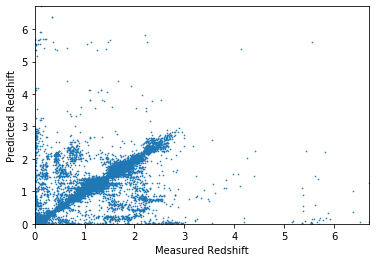

In [3]:
# paste your get_features_targets function here
def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0],4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets = data['redshift']
  return features,targets

# paste your median_diff function here
def median_diff(predicted, actual):
  med_diff = np.median(abs(predicted-actual))
  return med_diff

# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets) 
    # predict using the model
    prediction = model.predict(test_features)
        
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = prediction

  # return the predictions
  return all_predictions    

if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  # plot the results to see how well our model looks
  plt.scatter(targets, predictions, s=0.4)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()

# QSO AND GALAXY

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0],4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets = data['redshift']
  return features,targets

# paste your median_diff function here
def median_diff(predicted, actual):
  med_diff = np.median(abs(predicted-actual))
  return med_diff

# paste your cross_validate_model function here
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  accuracy = []
  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    # predict using the model
    prediction = model.predict(test_features)
    # calculate the median_diff from predicted values and append to results array
    accuracy.append(median_diff(prediction, test_targets))
 
  # return the list with your median difference values
  return accuracy
  
# complete this function
def split_galaxies_qsos(data):
  # split the data into galaxies and qsos arrays
    galaxies = data[data['spec_class'] == b'GALAXY']
    qsos = data[data['spec_class'] == b'QSO']
  # return the seperated galaxies and qsos arrays
    return galaxies, qsos


def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=19)
  return np.mean(cross_validate_model(dtr, features, targets, 10))

if __name__ == "__main__":
    data = np.load('./sdss_galaxy_colors.npy')

    # Split the data set into galaxies and QSOs
    galaxies, qsos= split_galaxies_qsos(data)

    # Here we cross validate the model and get the cross-validated median difference
    # The cross_validated_med_diff function is in "written_functions"
    galaxy_med_diff = cross_validate_median_diff(galaxies)
    qso_med_diff = cross_validate_median_diff(qsos)

    # Print the results
    print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
    print("Median difference for QSOs: {:.3f}".format(qso_med_diff))



Median difference for Galaxies: 0.016
Median difference for QSOs: 0.074
